# Importation des librairies python nécessaire

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import utility, importEtInsert_data,equilibrer_les_donnees

#  Importation et analyse des données

In [6]:
df=importEtInsert_data.Importation_dataFrame("Data_frame_fr")

df_train, df_test = train_test_split(df, random_state=77, test_size=0.30, shuffle=True)
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)


In [7]:
#Distribution de l'ensemble des données par catégories

utility.plot_distribution(df,"distribution de l'ensemble des données par catégories")

In [8]:
#Distribution des données d'entrainement par catégorie


utility.plot_distribution(df_train,"distribution des données d'entrainement par catégories")

# Amélioration de l'équilibre des données d'entrainement

### Oversampling

In [10]:
Train_Oversampling=importEtInsert_data.Importation_dataFrame('Train_Oversampling')

utility.plot_distribution(Train_Oversampling,"distribution de Train_Oversampling")

### Undersampling

In [13]:
categorie_a_diminuer=["hydraulic_equipment",
"rubber_or_plastic_products",
"recreational_cultural_and_sports_equipment",
"paper_and_cardboard",
"mining_and_minerals",
"wholesale_and_retail",
"water_related_works",
"agriculture",
"drinking_water",
"fire",
"silvicultural_products",
"provision_of_meals",
"postal_and_telecommunications_services",
"it_equipment_and_consumables",
"energy_and_environment",
"defence_and_security",
"petroleum_products_fuels",
"office_furniture_and_supplies",
"waste_management",
"communication_and_marketing_services",
"software_supply",
"ores_materials_and_construction_materials"]

train_Under=equilibrer_les_donnees.Undersampling(df_train,10000,categorie_a_diminuer)
utility.plot_distribution(train_Under,"distribution train_Under")


In [14]:
train_Under['Text'] = train_Under['Titre'] +" "+train_Under['Description']
df_test['Text'] = df_test['Titre'] +" "+df_test['Description']
df_valid['Text'] = df_valid['Titre'] +" "+df_valid['Description']
df_train=pd.concat([Train_Oversampling,train_Under])

In [17]:
utility.plot_distribution(df_train,"distribution de df_train après amélioration de l'équibre")

# Entrainement du modèle

In [ ]:
import entrainementDuModeleCamembert

entrainementDuModeleCamembert.main()

# Evaluation du modèle


 ################################# Importation des données ##################################### 



Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.
100%|██████████| 3134/3134 [10:54<00:00,  4.79it/s]


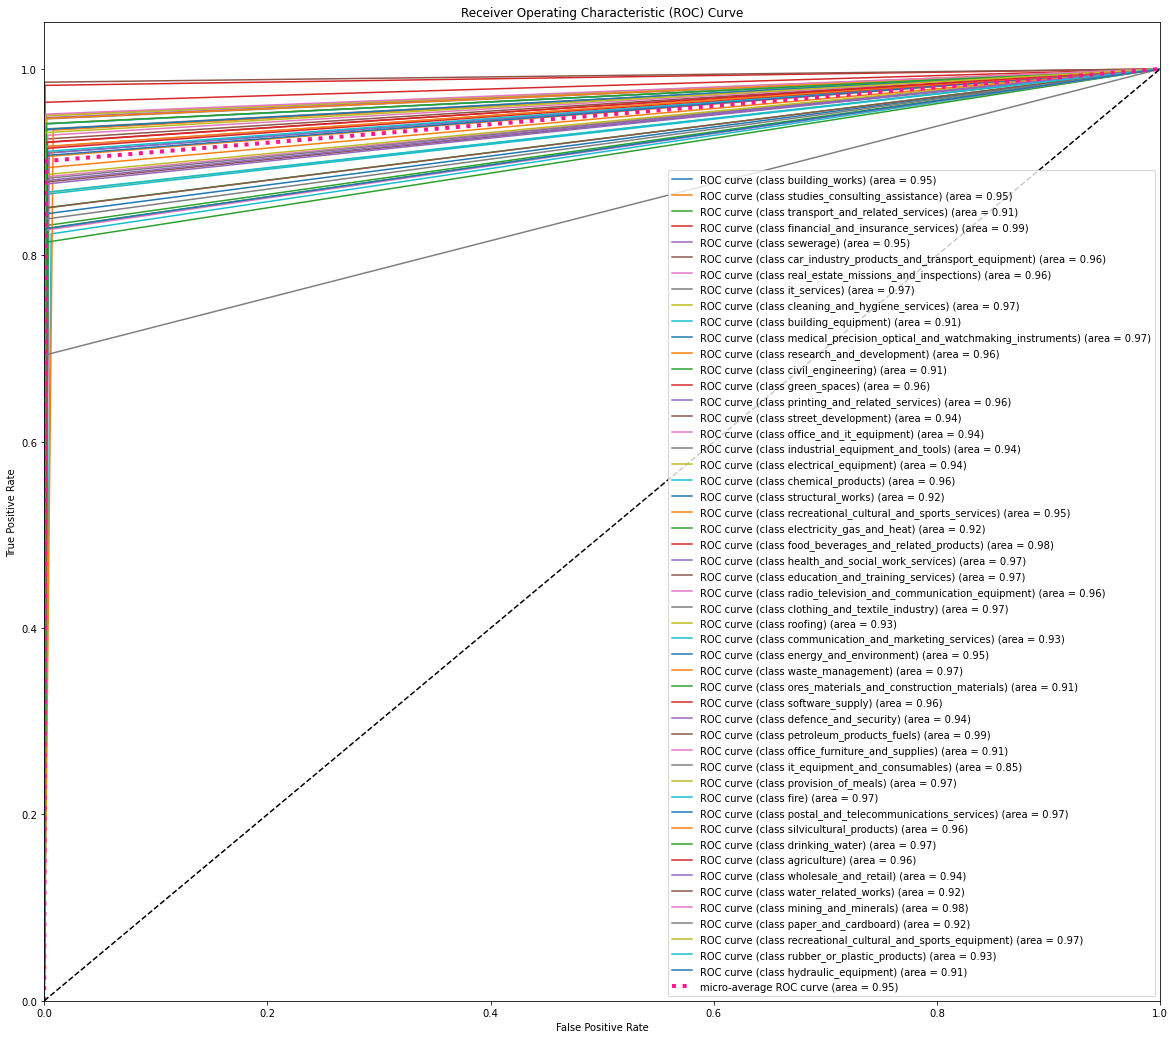

                                                       precision    recall  f1-score   support

                                       building_works       0.98      0.91      0.94     18585
                        studies_consulting_assistance       0.99      0.91      0.95     14928
                       transport_and_related_services       0.97      0.83      0.89     10341
                     financial_and_insurance_services       0.98      0.98      0.98      4075
                                             sewerage       0.92      0.91      0.91      5187
        car_industry_products_and_transport_equipment       0.96      0.92      0.94      4147
                 real_estate_missions_and_inspections       0.92      0.93      0.92      3892
                                          it_services       0.95      0.95      0.95      3822
                        cleaning_and_hygiene_services       0.94      0.95      0.94      3236
                                   building_equip

/home/mariam/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [1]:
import evaluation_modele

evaluation_modele.main()

# Prédiction du modèle

In [19]:
import predictionModel
predictionModel.main()

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Texte      :  recherche dune prestation dassistance pour mener 
                                  avec lassistance et les compétences techniques du fournisseur 
                                  les travaux relatifs « Prestation de déploiement au sein du MITI Deplog »
                                 
Prediction :  ['it_services']
